In [2]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

import ast

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df.job_skills=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\ADMIN\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Feb 17 18:21:58 2025).


**1. WHAT ARE THE MOST IN-DEMAND SKILLS FOR DATA JOBS IN VIETNAM?**

In [3]:
df_VN=df[df['job_country']=="Vietnam"]
job_skills=df_VN.explode('job_skills')
job_skills.groupby(['job_title_short','job_skills']).size()



job_title_short    job_skills
Business Analyst   airflow        1
                   angular        1
                   atlassian      1
                   aws            2
                   azure          4
                                 ..
Software Engineer  vue.js         4
                   windows       20
                   word           2
                   wsl            1
                   zoom           2
Length: 839, dtype: int64

In [4]:
df_skills=job_skills.groupby(['job_skills','job_title_short']).size().reset_index(name='counts')
df_skills=df_skills.sort_values(by='counts',ascending=False)
df_skills

,job_skills,job_title_short,counts
719,sql,Data Engineer,477
550,python,Data Engineer,468
692,spark,Data Engineer,282
301,java,Data Engineer,231
551,python,Data Scientist,230
...,...,...,...
458,notion,Cloud Engineer,1
448,nosql,Business Analyst,1
443,node,Data Scientist,1
437,no-sql,Data Analyst,1


In [66]:
#Get a list of the 3 most popular data job
df_job=df_VN.job_title_short.value_counts().head(3)
df_top_skills=df_job.index.to_list()
df_top_skills=sorted(df_top_skills)
df_top_skills

['Data Analyst', 'Data Engineer', 'Data Scientist']

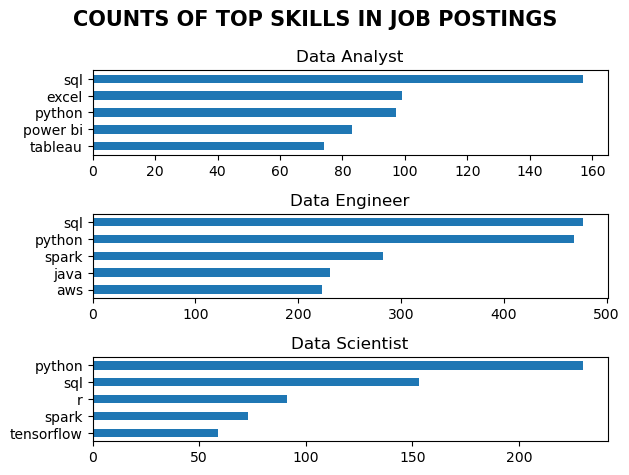

In [6]:
#Plotting
fig, ax = plt.subplots(len(df_top_skills), 1) 
for i, job_title in enumerate(df_top_skills):
    df_plot = df_skills[df_skills['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='counts', ax=ax[i], title=job_title) 
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle("COUNTS OF TOP SKILLS IN JOB POSTINGS", fontweight='bold',fontsize=15)
fig.tight_layout()
plt.show()


    






In [32]:
#Convert count to percentage
df_data_job=df_VN['job_title_short'].value_counts().reset_index(name='job_total')
df_skill_pct=pd.merge(df_skills,df_data_job,how='left',on='job_title_short')
df_skill_pct['job_pct']=100*(df_skill_pct.counts/df_skill_pct.job_total)
df_skill_pct


,job_skills,job_title_short,counts,job_total,job_pct
0,sql,Data Engineer,477,768,62.109375
1,python,Data Engineer,468,768,60.937500
2,spark,Data Engineer,282,768,36.718750
3,java,Data Engineer,231,768,30.078125
4,python,Data Scientist,230,375,61.333333
...,...,...,...,...,...
834,notion,Cloud Engineer,1,70,1.428571
835,nosql,Business Analyst,1,91,1.098901
836,node,Data Scientist,1,375,0.266667
837,no-sql,Data Analyst,1,334,0.299401


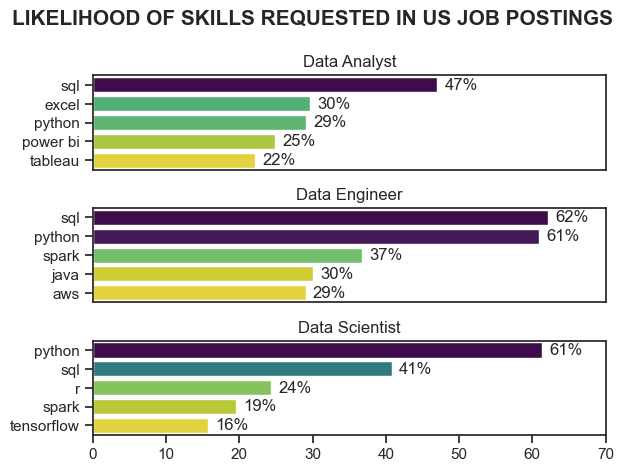

In [84]:
fig, ax = plt.subplots(len(df_top_skills), 1) 
sns.set_theme(style='ticks')
for i, job_title in enumerate(df_top_skills):
    df_plot = df_skill_pct[df_skill_pct['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='job_pct', ax=ax[i], title=job_title) 
    sns.barplot(data=df_plot,x='job_pct', y='job_skills',ax=ax[i],hue='job_pct', palette="viridis_r")
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,70)

    for n, v in enumerate(df_plot['job_pct']):
        ax[i].text(v+1, n, f'{v:.0f}%' , va='center')

    if i != len(df_top_skills) - 1:
        ax[i].set_xticks([])


    
   
    

fig.suptitle("LIKELIHOOD OF SKILLS REQUESTED IN US JOB POSTINGS", fontweight='bold',fontsize=15)
fig.tight_layout()
plt.show()
